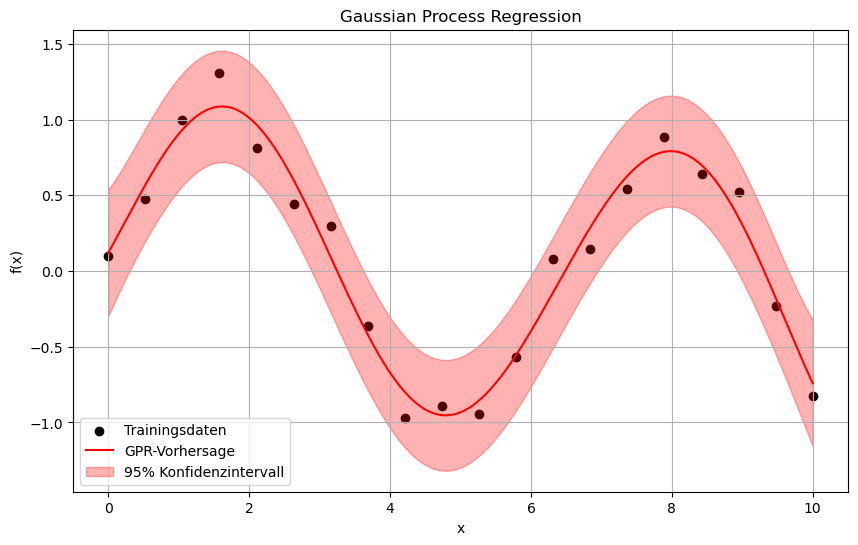

In [3]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, WhiteKernel

# Beispiel-Daten (nichtlinear)
np.random.seed(42)

input_data = np.linspace(0, 10, 20).reshape(-1, 1)
output_data = np.sin(X).ravel() + np.random.normal(0, 0.2, input_data.shape[0])

# Kernel definieren: RBF (Radial Basis Function) + WhiteKernel (Rauschen)
kernel = RBF(length_scale=1.0) + WhiteKernel(noise_level=0.1)

# GPR-Modell
gpr = GaussianProcessRegressor(kernel=kernel)
gpr.fit(input_data, output_data)

# Vorhersagebereich
input_data_pred = np.linspace(0, 10, 500).reshape(-1, 1)
output_data_pred, sigma = gpr.predict(input_data_pred, return_std=True)

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(input_data, output_data, color='black', label="Trainingsdaten")
plt.plot(input_data_pred, output_data_pred, 'r', label="GPR-Vorhersage")
plt.fill_between(input_data_pred.ravel(), output_data_pred - 1.96 * sigma, y_pred + 1.96 * sigma,
                 alpha=0.3, color='red', label="95% Konfidenzintervall")
plt.title("Gaussian Process Regression")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.grid(True)
plt.show()
